In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB4
from keras.layers import Input, Lambda, Dense, Flatten,GlobalAveragePooling2D,MaxPooling2D,Dropout
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
import numpy as np
from keras.models import Model
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
image_input = Input(shape=(224, 224, 3))
train_set='D:/Dataset/Melanoma Dataset/data/test'
test_set='D:/Dataset/Melanoma Dataset/data/test'
model = EfficientNetB4(input_tensor=image_input, include_top=True,weights='imagenet')
model.summary()



78880768/78864416 [==============================] - 0s 0us/step
Model: "efficientnetb4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (Zero

In [ ]:
last_layer = model.get_layer('top_activation').output
out = Dense(1, activation='relu', name='output')(last_layer)
custom_model = Model(image_input, out)
custom_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0]']      

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

#Training Set
train_set = train_datagen.flow_from_directory(r'/content/drive/MyDrive/Melanoma Dataset/data/train',
                                             target_size=(64,64),
                                             batch_size=16,
                                             class_mode='binary')
#Validation Set
test_set = test_datagen.flow_from_directory(r'/content/drive/MyDrive/Melanoma Dataset/data/test',
                                           target_size=(64,64),
                                           batch_size = 16,
                                           class_mode='binary',
                                           shuffle=False)

Found 2652 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [ ]:
classifier=Sequential()
classifier.add(Flatten())
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
classifier.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])
history = classifier.fit(train_set,
                        steps_per_epoch=(2652/16),
                        epochs = 30,
                        validation_data = test_set,
                        validation_steps =(400/16),
                        #callbacks=[tensorboard]
                        );

Epoch 1/30
165/165 [==============================] - 358s 2s/step - loss: 0.8299 - accuracy: 0.6233 - val_loss: 0.7033 - val_accuracy: 0.6650
Epoch 2/30
165/165 [==============================] - 16s 99ms/step - loss: 0.5591 - accuracy: 0.7179 - val_loss: 0.5458 - val_accuracy: 0.7500
Epoch 3/30
165/165 [==============================] - 16s 98ms/step - loss: 0.5317 - accuracy: 0.7357 - val_loss: 0.4606 - val_accuracy: 0.7725
Epoch 4/30
165/165 [==============================] - 17s 105ms/step - loss: 0.5013 - accuracy: 0.7508 - val_loss: 0.6751 - val_accuracy: 0.6750
Epoch 5/30
165/165 [==============================] - 16s 98ms/step - loss: 0.5483 - accuracy: 0.7323 - val_loss: 0.4655 - val_accuracy: 0.7975
Epoch 6/30
165/165 [==============================] - 16s 98ms/step - loss: 0.5154 - accuracy: 0.7406 - val_loss: 0.4596 - val_accuracy: 0.7975
Epoch 7/30
165/165 [==============================] - 16s 99ms/step - loss: 0.5125 - accuracy: 0.7462 - val_loss: 0.8336 - val_accuracy:

In [ ]:
model.save('/content/drive/MyDrive/saved_models/model3.hdf5')

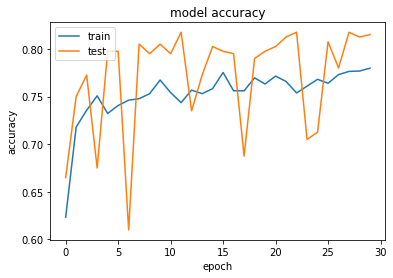

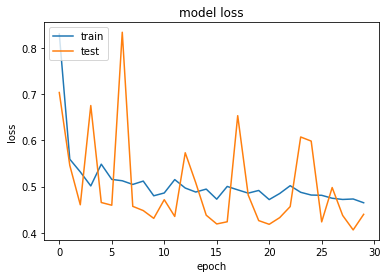

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

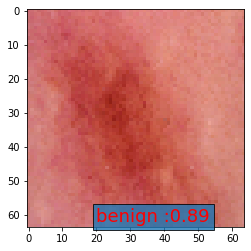

In [ ]:
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img(r'/content/drive/MyDrive/Melanoma Dataset/data/test/benign/136.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='malignant :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(alpha=0.8))
else:
    value ='benign :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(alpha=0.8))

plt.imshow(img1)
plt.show()

In [ ]:
import pandas as pd
test_set.reset
ytesthat = classifier.predict_generator(test_set)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df.head(10)

,filename,predict,y,y_pred
0,benign/1.jpg,0.09834,0,0
1,benign/10.jpg,0.36694,0,0
2,benign/11.jpg,0.23394,0,0
3,benign/12.jpg,0.45163,0,0
4,benign/13.jpg,0.07850,0,0
5,benign/136.jpg,0.11011,0,0
6,benign/137.jpg,0.34568,0,0
7,benign/138.jpg,0.38028,0,0
8,benign/139.jpg,0.09884,0,0
9,benign/14.jpg,0.16757,0,0


In [ ]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 400 Validation images : %d'%misclassified['y'].count())

Total misclassified image from 400 Validation images : 74


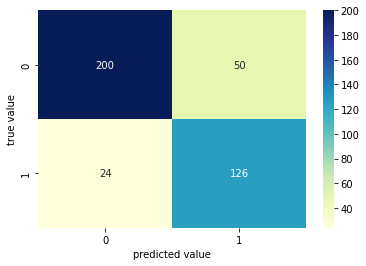

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

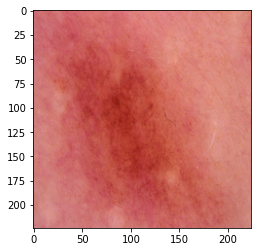

In [ ]:
img1 = image.load_img(r'/content/drive/MyDrive/Melanoma Dataset/data/test/benign/136.jpg')
plt.imshow(img1);
#preprocess image
img1 = image.load_img(r'/content/drive/MyDrive/Melanoma Dataset/data/test/benign/136.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [ ]:
x1 = classifier.evaluate_generator(train_set)
x2 = classifier.evaluate_generator(test_set)

In [ ]:
print('Training Accuracy  : %1.2f%%     Training loss  : %1.6f'%(x1[1]*100,x1[0]))
print('Validation Accuracy: %1.2f%%     Validation loss: %1.6f'%(x2[1]*100,x2[0]))

Training Accuracy  : 78.66%     Training loss  : 0.452676
Validation Accuracy: 81.50%     Validation loss: 0.439906


In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
confusion_df = pd.DataFrame(confusion_matrix(df.y,df.y_pred),
                           columns=["Predicted Class" + str(class_name) for class_name in [0,1]],
                           index = ["Class" + str(class_name) for class_name in [0,1]])

print(confusion_df)

        Predicted Class0  Predicted Class1
Class0               200                50
Class1                24               126


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(df.y,df.y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       250
           1       0.72      0.84      0.77       150

    accuracy                           0.81       400
   macro avg       0.80      0.82      0.81       400
weighted avg       0.83      0.81      0.82       400

